In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib qt
%matplotlib inline
%load_ext watermark
%watermark

Last updated: 2022-02-14T17:32:20.726224+01:00

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD
CPU cores   : 12
Architecture: 64bit



In [2]:
# velocity-verlet for the harmonic oscillator
class velocity_verlet:
    def update_position(x,v,a1,dt): # return x
        return x + v*dt + 0.5*a1*dt**2
    def update_acceleration(x,k,m): # return a2
        return -k*x
    def update_velocity(v,a1,a2,dt): # return v
        return v + 0.5*(a1+a2)*dt

# variables simu
dt = 1e-3 # s

# variables oscillateur harmonique
m = 1 # kg
omega = 2*np.pi*2
k = m*omega**2 # for \omega = 1Hz

t = np.arange(0,2,dt)
x,v,a1 = [[],[],[]]

# initialisation
x.append(0.001)
v.append(0)
a1.append(-k*x[0])
a2 = []

In [3]:
# VV algorithm

for time in t[:-1]:
    x.append( velocity_verlet.update_position(x[-1],v[-1],a1[-1],dt) )
    a2.append( velocity_verlet.update_acceleration(x[-1],k,m) )
    v.append( velocity_verlet.update_velocity(v[-1],a1[-1],a2[-1],dt) )
    a1.append(a2[-1])

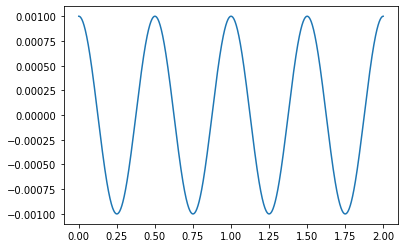

In [4]:
plt.figure('Velocity_Verlet algorithm',clear='True')
ax = plt.subplot(111)

ax.plot(t,x)
# ax.plot(t,v,color='g',ls='--')
# ax.plot(t,a1,color='r')